# Analyse Std Dev Markit Germany

In [56]:
# import des libs
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
from os import *
from os.path import *
import xlwings as xw
from xlwings import Range 

In [57]:
os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')
data = pd.read_csv(r"Data Mark-It Raw 07.csv")

data = data[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]


C:\Users\rmolli\AppData\Local\Temp\ipykernel_80412\665143095.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"Data Mark-It Raw 07.csv")


## Germany Base Load Analysis

In [58]:
short_term = ['2022-05-31 00:00:00', '2022-06-30 00:00:00',
       '2022-07-31 00:00:00', '2022-08-31 00:00:00',
       '2022-09-30 00:00:00', '2022-10-31 00:00:00',
       '2022-11-30 00:00:00', '2022-12-31 00:00:00',
     ]

long_term = ['2023-01-31 00:00:00', '2023-02-28 00:00:00',
       '2023-03-31 00:00:00', '2023-04-30 00:00:00',
       '2023-05-31 00:00:00', '2023-06-30 00:00:00',
       '2023-07-31 00:00:00', '2023-08-31 00:00:00',
       '2023-09-30 00:00:00', '2023-10-31 00:00:00',
       '2023-11-30 00:00:00', '2023-12-31 00:00:00',
       '2024-01-31 00:00:00', '2024-02-29 00:00:00',
       '2024-03-31 00:00:00', '2024-04-30 00:00:00',
       '2024-05-31 00:00:00', '2024-06-30 00:00:00',
       '2024-07-31 00:00:00', '2024-08-31 00:00:00',
       '2024-09-30 00:00:00', '2024-10-31 00:00:00',
       '2024-11-30 00:00:00', '2024-12-31 00:00:00',
       '2025-01-31 00:00:00', '2025-02-28 00:00:00',
       '2025-03-31 00:00:00', '2025-04-30 00:00:00',
       '2025-05-31 00:00:00', '2025-06-30 00:00:00',
       '2025-07-31 00:00:00', '2025-08-31 00:00:00',
       '2025-09-30 00:00:00', '2025-10-31 00:00:00',
       '2025-11-30 00:00:00', '2025-12-31 00:00:00',
       '2026-01-31 00:00:00', '2026-02-28 00:00:00',
       '2026-03-31 00:00:00', '2026-04-30 00:00:00',
       '2026-05-31 00:00:00', '2026-06-30 00:00:00',
       '2031-07-31 00:00:00', '2031-08-31 00:00:00',
       '2031-09-30 00:00:00', '2031-10-31 00:00:00',
       '2031-11-30 00:00:00', '2031-12-31 00:00:00',
       '2032-01-31 00:00:00', '2032-02-29 00:00:00',
       '2032-03-31 00:00:00', '2032-04-30 00:00:00']

### Calcul Divers

In [59]:
data_ger_BL= data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate'] == '2023-01-31 00:00:00' ) ,:]
print(data_ger_BL["ns1:StandardDeviationPrice"].max())
print(data_ger_BL["ns1:StandardDeviationPrice"].min())
print(round(data_ger_BL["ns1:StandardDeviationPrice"].mean(),2))

9.19118086
8.0515304
8.74


In [60]:
data_ger_BL= data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate'].isin(short_term) ) ,:]
print(data_ger_BL["ns1:StandardDeviationPrice"].max())
print(data_ger_BL["ns1:StandardDeviationPrice"].min())
print(round(data_ger_BL["ns1:StandardDeviationPrice"].mean(),2))

10.20882735
0.63189144
3.53


### Analyse Quarters

In [61]:
quarters = data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:Period'] == 'Quarter' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Ger_quarters = pd.DataFrame(columns = quarters, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Ger_quarters.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Ger_quarters.shape[1]):
        recap_Ger_quarters.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Ger_quarters.shape[1]):
        recap_Ger_quarters.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Ger_quarters.shape[1]):
        recap_Ger_quarters.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Ger_quarters.shape[1]):
      recap_Ger_quarters.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)


recap_Ger_quarters.dropna(inplace = True, axis='columns' )
recap_Ger_quarters

,2022-12-31 00:00:00,2023-03-31 00:00:00,2023-06-30 00:00:00,2023-09-30 00:00:00,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,2025-03-31 00:00:00,...,2026-09-30 00:00:00,2026-12-31 00:00:00,2027-03-31 00:00:00,2027-06-30 00:00:00,2027-09-30 00:00:00,2027-12-31 00:00:00,2028-03-31 00:00:00,2028-06-30 00:00:00,2028-09-30 00:00:00,2028-12-31 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,,
Min,1.2,0.85,2.06,1.71,0.57,4.21,1.51,3.49,0.45,5.04,...,1.74,0.78,2.6,0.7,0.95,1.1,3.49,1.93,1.54,0.85
Average,3.78,8.17,2.74,3.07,3.84,8.33,4.31,6.86,3.71,9.94,...,3.05,3.0,5.3,2.88,2.25,2.4,3.49,1.93,1.54,2.26
Max,9.56,16.75,4.1,4.46,6.75,14.77,6.86,8.83,6.98,13.59,...,5.25,5.73,8.34,4.14,4.53,3.75,3.49,1.93,1.54,4.0
Nb of Prices,16.67,15.43,15.05,14.2,14.98,13.18,13.12,13.1,13.92,12.2,...,8.15,8.72,7.6,7.38,6.28,6.53,4.86,4.83,4.88,4.98


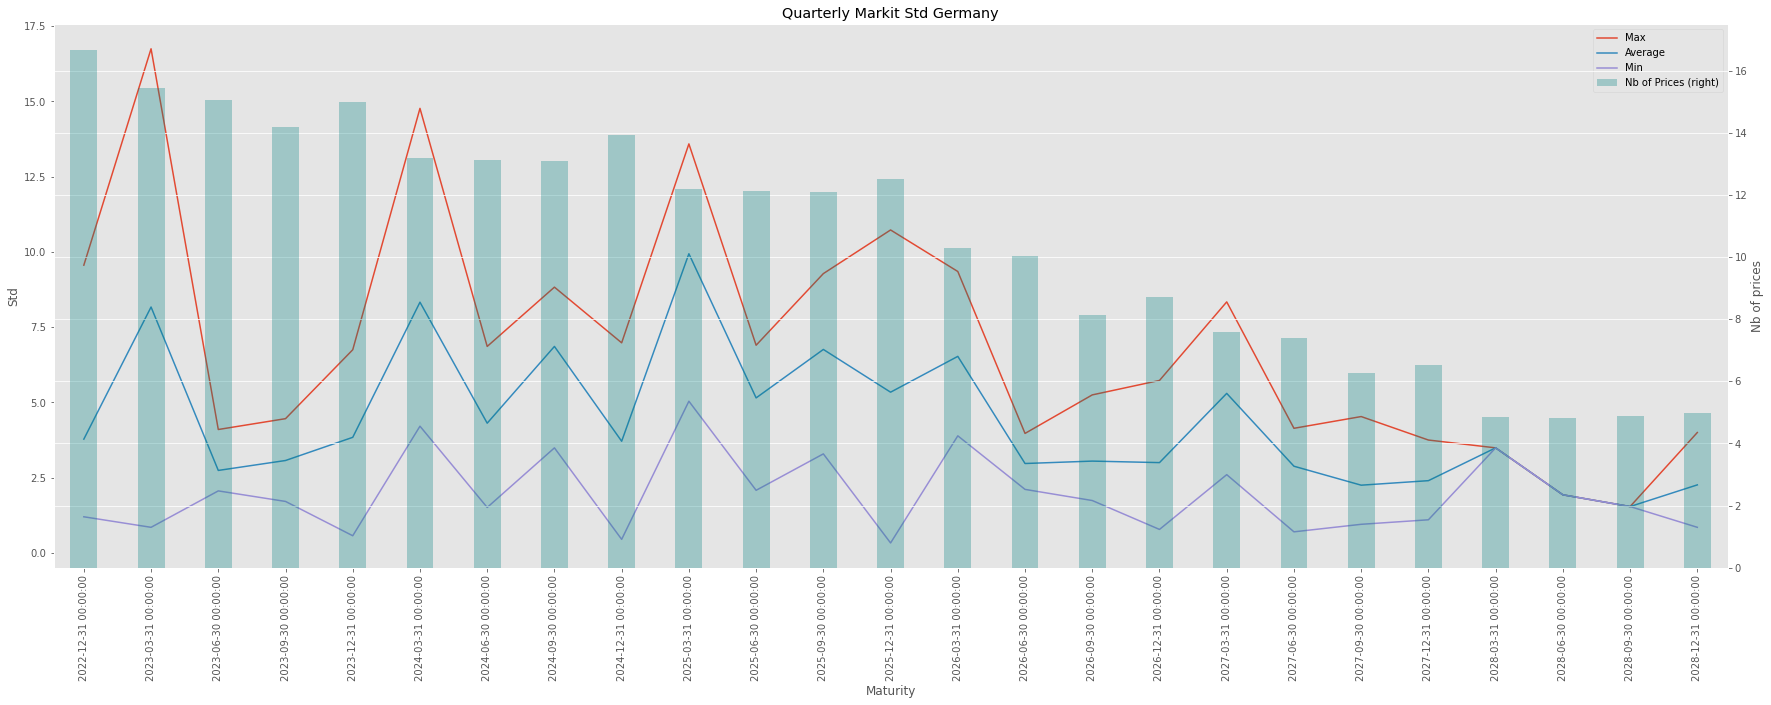

In [62]:
plt.figure(figsize=(30, 10))
plt.title("Quarterly Markit Std Germany")

ax1 = recap_Ger_quarters.loc['Max'].plot(legend = True)
ax1 = recap_Ger_quarters.loc['Average'].plot(legend = True)
ax1 = recap_Ger_quarters.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std")

ax2 = recap_Ger_quarters.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True)
ax2.set_ylabel("Nb of prices");

In [63]:
print(round(recap_Ger_quarters.loc["Min", :].mean(),2))
print(round(recap_Ger_quarters.loc["Max", :].mean(),2))
print(round(recap_Ger_quarters.loc["Average", :].mean(),2))

1.94
7.02
4.38


### Analyse Months

In [64]:
months = data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:Period'] == 'Month' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Ger_months = pd.DataFrame(columns = months, index = ['Min', 'Average', 'Max', 'Nb of Prices' ] )
recap_Ger_months.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Ger_months.shape[1]):
        recap_Ger_months.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Ger_months.shape[1]):
        recap_Ger_months.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Ger_months.shape[1]):
        recap_Ger_months.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Ger_months.shape[1]):
        recap_Ger_months.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_months.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Ger_months.dropna(inplace = True, axis='columns' )
recap_Ger_months

,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,...,2027-07-31 00:00:00,2027-08-31 00:00:00,2027-09-30 00:00:00,2027-10-31 00:00:00,2027-11-30 00:00:00,2027-12-31 00:00:00,2028-03-31 00:00:00,2028-06-30 00:00:00,2028-09-30 00:00:00,2028-12-31 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,,
Min,0.63,1.59,1.5,3.97,1.2,8.05,6.64,0.85,1.96,2.81,...,0.82,0.88,0.95,2.53,2.9,1.1,3.49,1.93,1.54,0.85
Average,2.27,2.94,2.45,6.33,3.78,8.74,9.61,8.17,3.55,4.4,...,2.55,2.9,2.25,2.68,4.0,2.4,3.49,1.93,1.54,2.26
Max,4.59,5.32,3.69,10.21,9.56,9.19,11.32,16.75,4.55,5.88,...,4.08,4.64,4.53,2.91,5.24,3.75,3.49,1.93,1.54,4.0
Nb of Prices,15.35,17.27,15.4,15.0,16.67,14.5,14.45,15.43,14.3,14.25,...,7.1,6.05,6.28,5.79,5.74,6.53,4.86,4.83,4.88,4.98


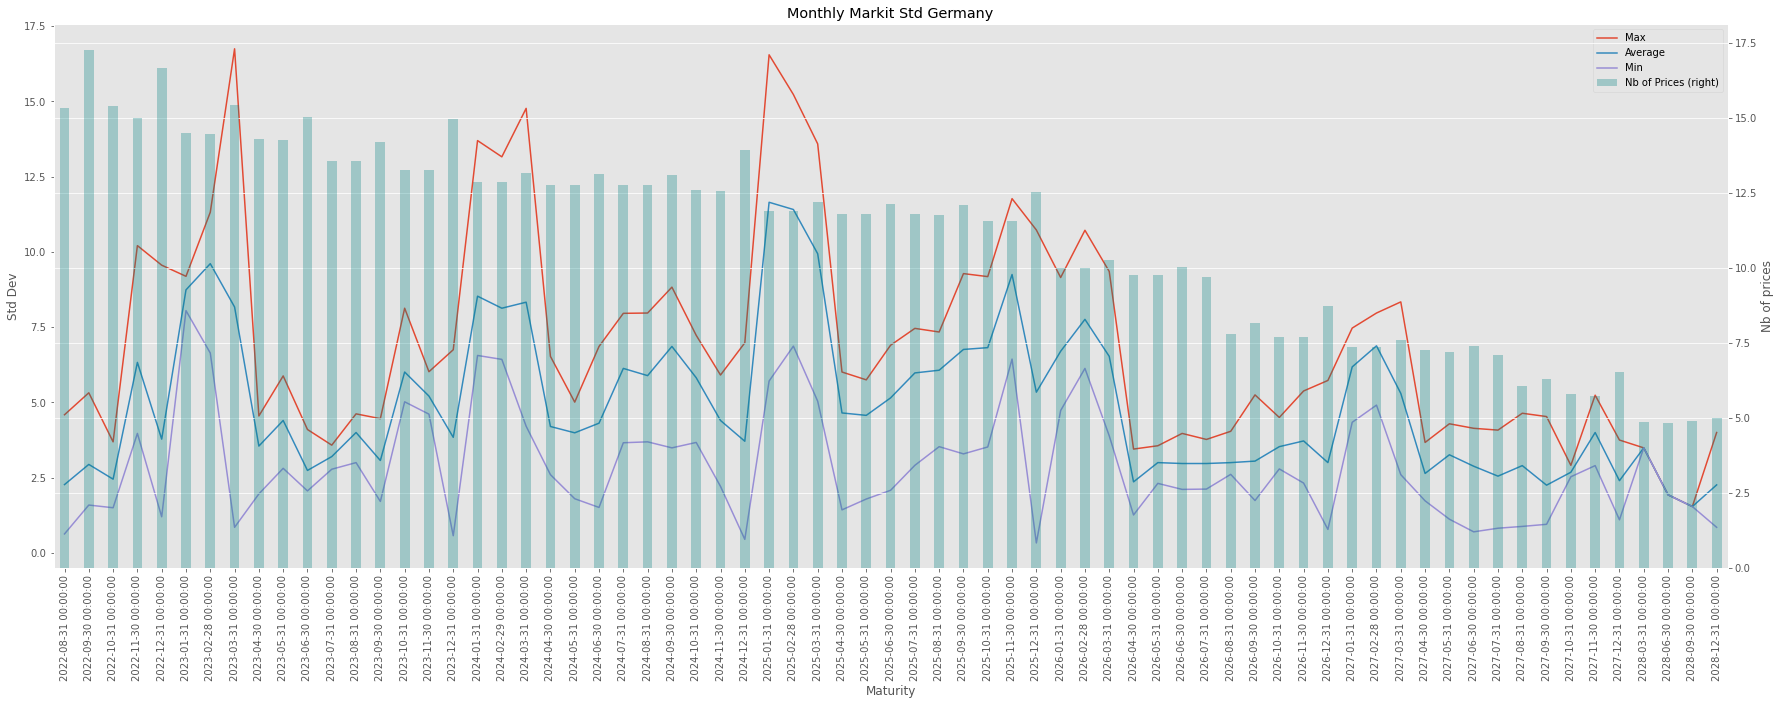

In [65]:
plt.figure(figsize=(30, 10))
plt.title("Monthly Markit Std Germany")

recap_Ger_months.loc['Max'].plot(legend = True)
recap_Ger_months.loc['Average'].plot(legend = True)
ax1= recap_Ger_months.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Ger_months.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True)
ax2.set_ylabel("Nb of prices");

In [66]:
print(round(recap_Ger_months.loc["Min", :].mean(),2))
print(round(recap_Ger_months.loc["Max", :].mean(),2))
print(round(recap_Ger_months.loc["Average", :].mean(),2))

2.86
7.02
4.93


### Analyse Years

In [67]:
years = data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:Period'] == 'Year' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Ger_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Ger_years.index.name = 'Statistics | Maturity'
recap_Ger_years

,2023-12-31 00:00:00,2024-12-31 00:00:00,2025-12-31 00:00:00,2026-12-31 00:00:00,2027-12-31 00:00:00,2028-12-31 00:00:00,2029-12-31 00:00:00,2030-12-31 00:00:00,2031-12-31 00:00:00
Statistics | Maturity,,,,,,,,,
Min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nb of Prices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
years = data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:Period'] == 'Year' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Ger_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Ger_years.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Ger_years.shape[1]):
        recap_Ger_years.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Ger_years.shape[1]):
        recap_Ger_years.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Ger_years.shape[1]):
        recap_Ger_years.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Ger_years.shape[1]):
        recap_Ger_years.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_years.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Ger_years.dropna(inplace = True, axis='columns' )
recap_Ger_years


,2023-12-31 00:00:00,2024-12-31 00:00:00,2025-12-31 00:00:00,2026-12-31 00:00:00,2027-12-31 00:00:00,2028-12-31 00:00:00
Statistics | Maturity,,,,,,
Min,0.57,0.45,0.33,0.78,1.1,0.85
Average,3.84,3.71,5.34,3.0,2.4,2.26
Max,6.75,6.98,10.73,5.73,3.75,4.0
Nb of Prices,14.98,13.92,12.53,8.72,6.53,4.98


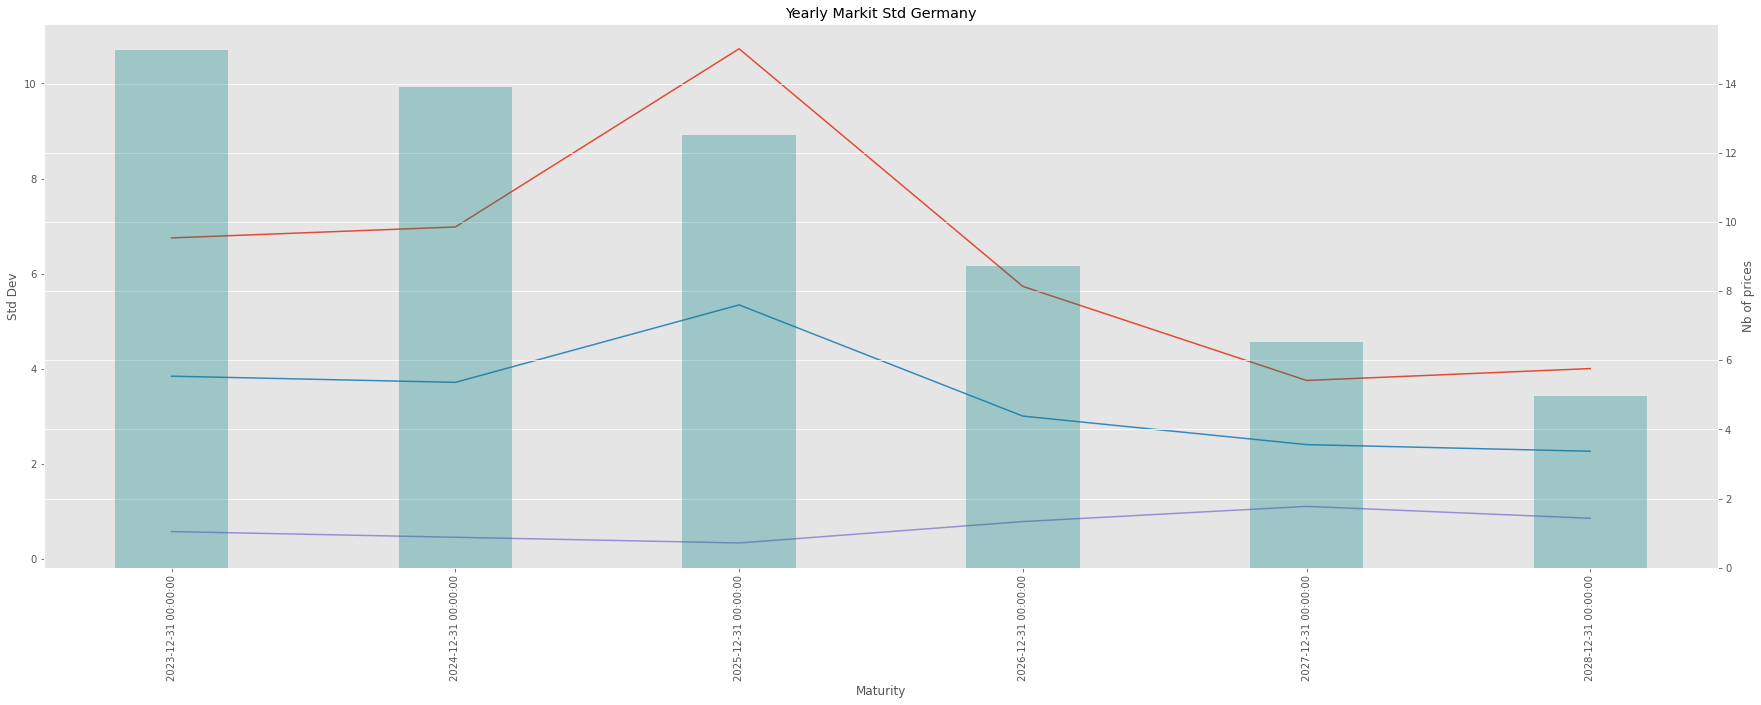

In [69]:
plt.figure(figsize=(30, 10))
plt.title("Yearly Markit Std Germany")

recap_Ger_years.loc['Max'].plot()
recap_Ger_years.loc['Average'].plot()
ax1= recap_Ger_years.loc['Min'].plot()

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Ger_years.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");

In [70]:
print(round(recap_Ger_years.loc["Min", :].mean(),2))
print(round(recap_Ger_years.loc["Max", :].mean(),2))
print(round(recap_Ger_years.loc["Average", :].mean(),2))

0.68
6.32
3.42


## Germany Peaks Analysis

In [71]:
data.loc[(data['ns1:Period'] == 'Quarter' ),:]["ns1:Underlying1"]

73            BELGIAN POWER - BASELOAD
74            BELGIAN POWER - BASELOAD
75            BELGIAN POWER - BASELOAD
76            BELGIAN POWER - BASELOAD
77            BELGIAN POWER - BASELOAD
                     ...              
72034    UK POWER - PEAKLOAD (NON-EFA)
72035    UK POWER - PEAKLOAD (NON-EFA)
72036    UK POWER - PEAKLOAD (NON-EFA)
72037    UK POWER - PEAKLOAD (NON-EFA)
72038    UK POWER - PEAKLOAD (NON-EFA)
Name: ns1:Underlying1, Length: 16348, dtype: object

### Analyse Quarters

In [72]:
quarters = data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:Period'] == 'Quarter' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Ger_quarters = pd.DataFrame(columns = quarters, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Ger_quarters.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Ger_quarters.shape[1]):
        recap_Ger_quarters.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Ger_quarters.shape[1]):
        recap_Ger_quarters.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Ger_quarters.shape[1]):
        recap_Ger_quarters.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Ger_quarters.shape[1]):
      recap_Ger_quarters.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)


recap_Ger_quarters.dropna(inplace = True, axis='columns' )
recap_Ger_quarters

,2022-12-31 00:00:00,2023-03-31 00:00:00,2023-06-30 00:00:00,2023-09-30 00:00:00,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,2025-03-31 00:00:00,...,2026-09-30 00:00:00,2026-12-31 00:00:00,2027-03-31 00:00:00,2027-06-30 00:00:00,2027-09-30 00:00:00,2027-12-31 00:00:00,2028-03-31 00:00:00,2028-06-30 00:00:00,2028-09-30 00:00:00,2028-12-31 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,,
Min,1.87,2.65,2.18,3.63,1.86,6.33,4.16,6.79,1.89,2.91,...,1.95,1.72,3.22,4.7,1.67,2.96,7.36,6.09,6.01,3.73
Average,8.2,10.87,5.31,7.44,11.23,13.99,7.52,10.29,5.12,7.13,...,4.35,4.69,8.98,6.35,4.28,4.3,7.36,6.09,6.01,4.92
Max,20.57,17.2,9.89,13.85,20.03,20.32,13.98,16.45,9.42,14.05,...,7.64,10.22,13.3,8.37,6.22,5.97,7.36,6.09,6.01,6.52
Nb of Prices,13.7,12.18,11.4,10.65,11.55,9.47,9.32,9.32,10.37,8.38,...,7.05,7.65,5.95,5.95,5.03,5.42,4.03,4.03,4.06,4.25


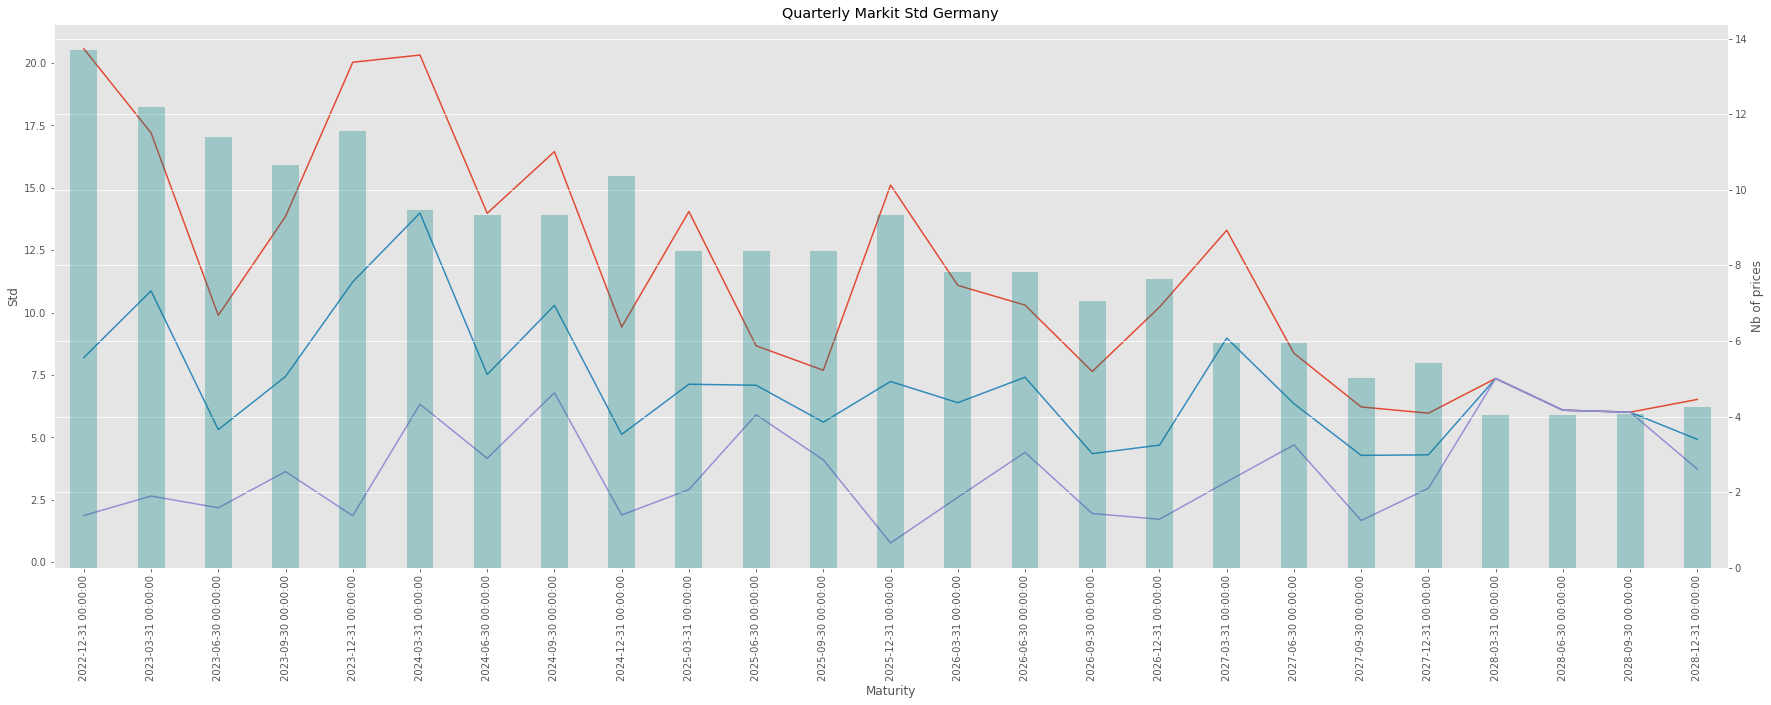

In [73]:
plt.figure(figsize=(30, 10))
plt.title("Quarterly Markit Std Germany")

recap_Ger_quarters.loc['Max'].plot()
recap_Ger_quarters.loc['Average'].plot()
ax1= recap_Ger_quarters.loc['Min'].plot()

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std")

ax2 = recap_Ger_quarters.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");

In [74]:
print(round(recap_Ger_quarters.loc["Min", :].mean(),2))
print(round(recap_Ger_quarters.loc["Max", :].mean(),2))
print(round(recap_Ger_quarters.loc["Average", :].mean(),2))

3.66
11.45
7.13


### Analyse Months

In [75]:
months = data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:Period'] == 'Month' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Ger_months = pd.DataFrame(columns = months, index = ['Min', 'Average', 'Max', 'Nb of Prices' ] )
recap_Ger_months.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Ger_months.shape[1]):
        recap_Ger_months.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Ger_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Ger_months.shape[1]):
        recap_Ger_months.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Ger_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Ger_months.shape[1]):
        recap_Ger_months.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Ger_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Ger_months.shape[1]):
        recap_Ger_months.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Ger_months.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Ger_months.dropna(inplace = True, axis ='columns' )
recap_Ger_months

,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,...,2027-07-31 00:00:00,2027-08-31 00:00:00,2027-09-30 00:00:00,2027-10-31 00:00:00,2027-11-30 00:00:00,2027-12-31 00:00:00,2028-03-31 00:00:00,2028-06-30 00:00:00,2028-09-30 00:00:00,2028-12-31 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,,
Min,1.8,3.05,16.69,6.29,1.87,3.43,9.79,2.65,2.18,5.48,...,5.94,4.54,1.67,5.8,5.92,2.96,7.36,6.09,6.01,3.73
Average,3.57,4.18,18.8,9.14,8.2,10.82,13.54,10.87,5.16,8.51,...,5.94,4.54,4.28,5.8,5.92,4.3,7.36,6.09,6.01,4.92
Max,6.34,6.84,20.68,12.77,20.57,15.44,17.76,17.2,9.13,12.81,...,5.94,4.54,6.22,5.8,5.92,5.97,7.36,6.09,6.01,6.52
Nb of Prices,12.65,13.85,13.1,13.1,13.7,12.1,11.95,12.18,11.3,11.25,...,5.45,4.55,5.03,4.5,4.5,5.42,4.03,4.03,4.06,4.25


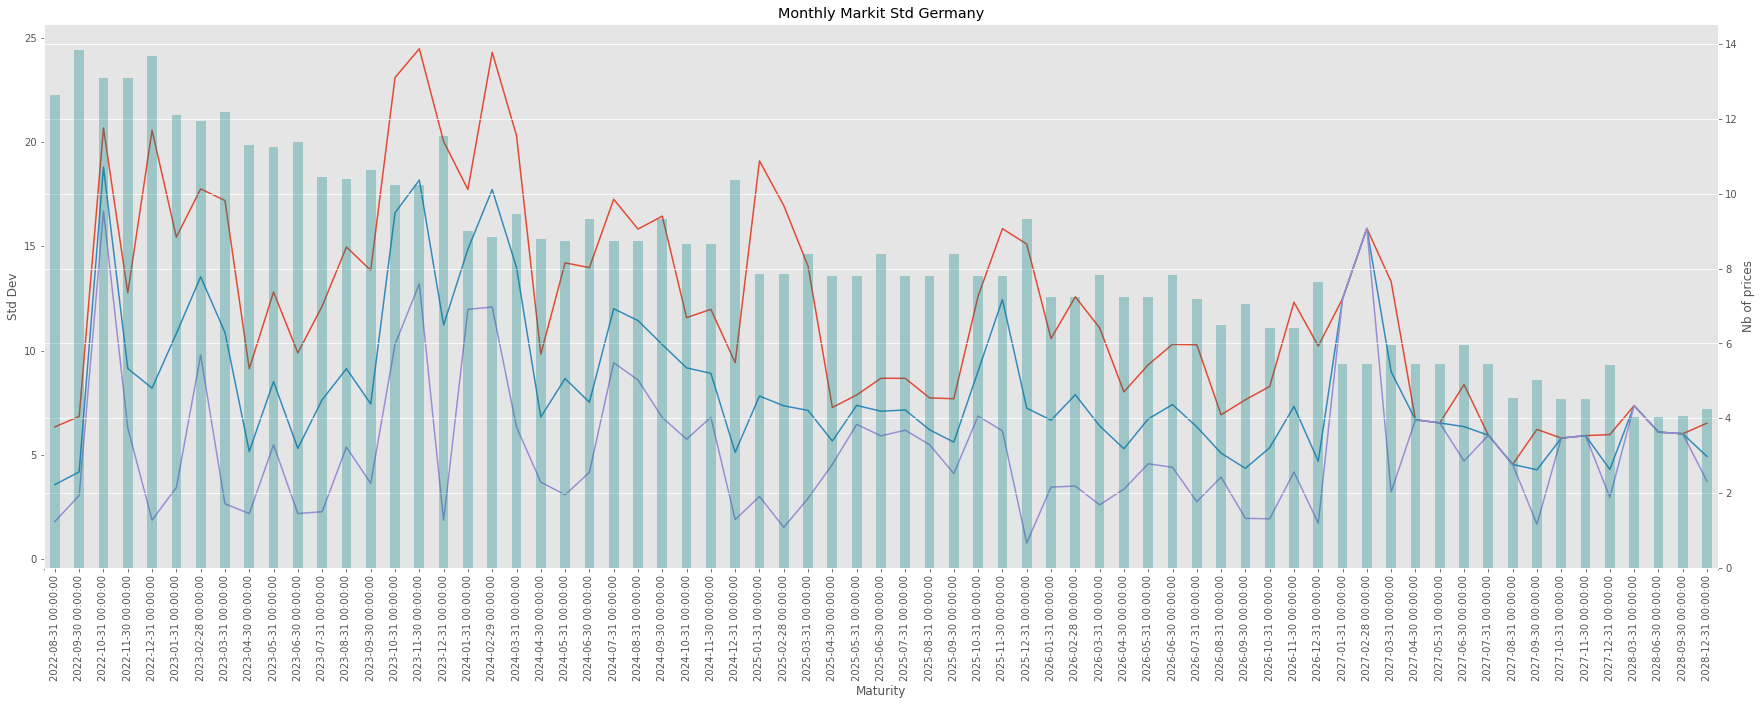

In [76]:
plt.figure(figsize=(30, 10))
plt.title("Monthly Markit Std Germany")

recap_Ger_months.loc['Max'].plot()
recap_Ger_months.loc['Average'].plot()
ax1= recap_Ger_months.loc['Min'].plot()

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Ger_months.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");

plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[4,7,10]))

In [77]:
print(round(recap_Ger_months.loc["Min", :].mean(),2))
print(round(recap_Ger_months.loc["Max", :].mean(),2))
print(round(recap_Ger_months.loc["Average", :].mean(),2))

5.28
11.94
8.27


### Analyse Years

In [78]:
years = data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:Period'] == 'Year' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Ger_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Ger_years.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Ger_years.shape[1]):
        recap_Ger_years.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Ger_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Ger_years.shape[1]):
        recap_Ger_years.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Ger_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Ger_years.shape[1]):
        recap_Ger_years.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Ger_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Ger_years.shape[1]):
        recap_Ger_years.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Ger_years.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Ger_years.dropna(inplace = True, axis='columns' )
recap_Ger_years


,2023-12-31 00:00:00,2024-12-31 00:00:00,2025-12-31 00:00:00,2026-12-31 00:00:00,2027-12-31 00:00:00,2028-12-31 00:00:00
Statistics | Maturity,,,,,,
Min,1.86,1.89,0.77,1.72,2.96,3.73
Average,11.23,5.12,7.24,4.69,4.3,4.92
Max,20.03,9.42,15.11,10.22,5.97,6.52
Nb of Prices,11.55,10.37,9.33,7.65,5.42,4.25


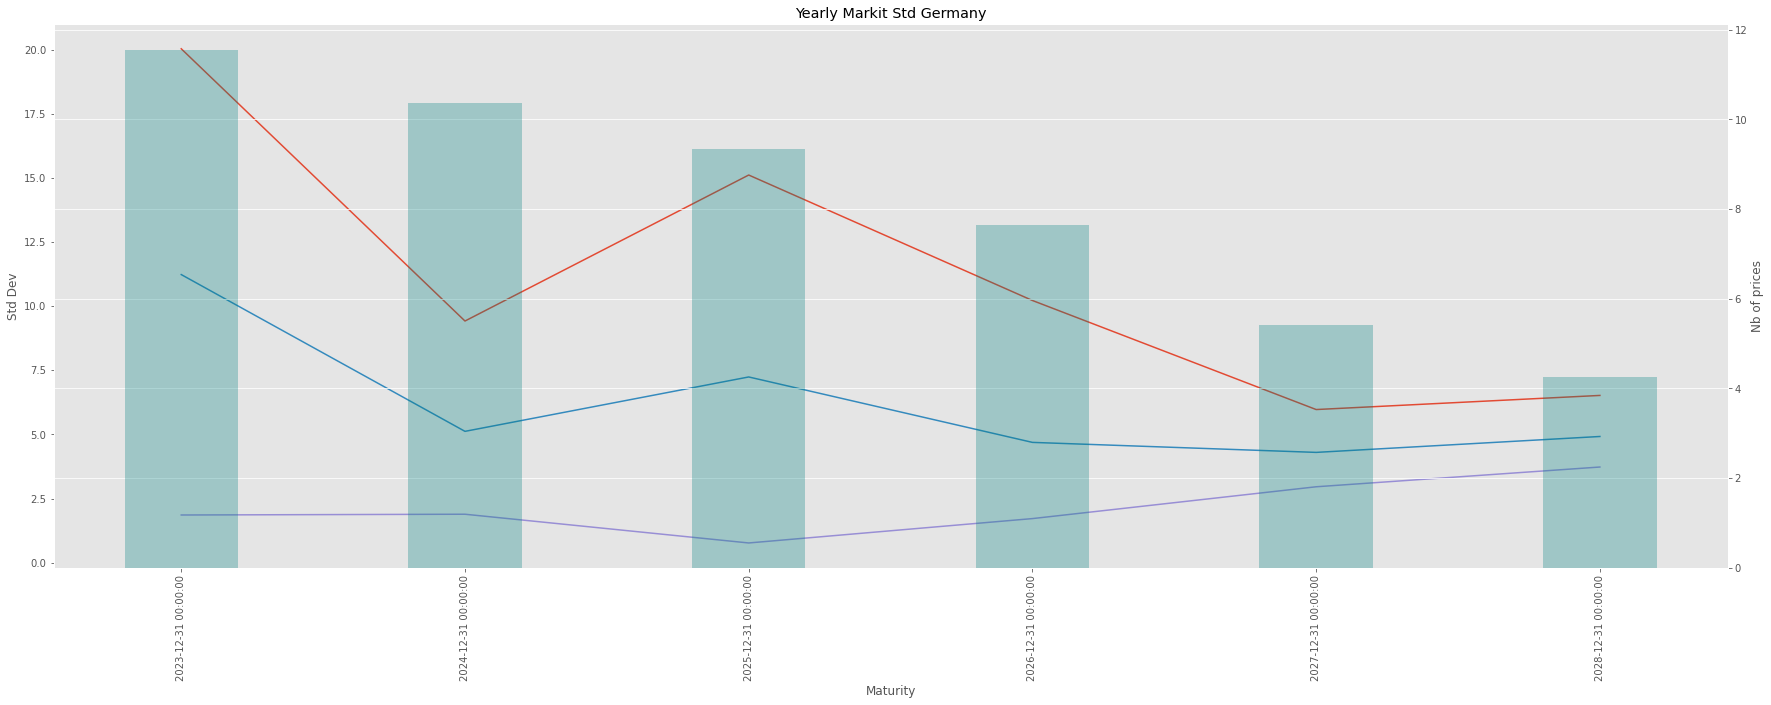

In [79]:
plt.figure(figsize=(30, 10))
plt.title("Yearly Markit Std Germany")

recap_Ger_years.loc['Max'].plot()
recap_Ger_years.loc['Average'].plot()
ax1= recap_Ger_years.loc['Min'].plot()

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Ger_years.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");

In [80]:
print(round(recap_Ger_years.loc["Min", :].mean(),2))
print(round(recap_Ger_years.loc["Max", :].mean(),2))
print(round(recap_Ger_years.loc["Average", :].mean(),2))

2.15
11.21
6.25
